In [1]:
# 1. Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder




This code imports essential libraries for data manipulation (**NumPy**), visualization (**Matplotlib**), dataset splitting (**train_test_split**), and encoding categorical labels into one-hot format (**OneHotEncoder**).

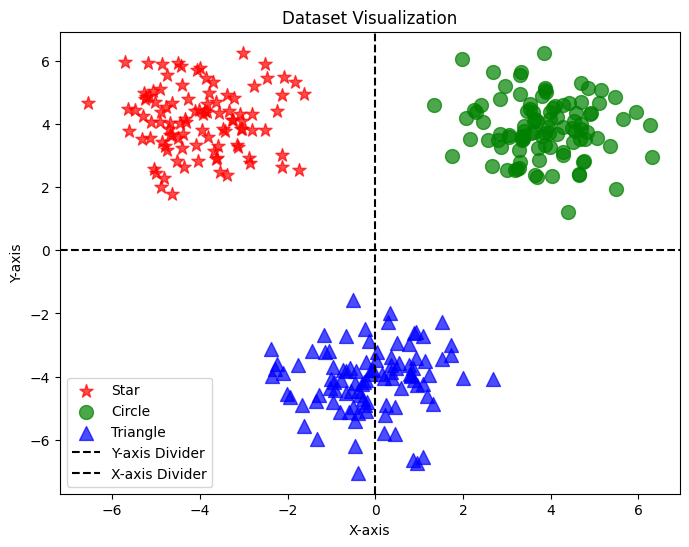

In [2]:
# Dataset Creation
np.random.seed(0)


star = np.random.randn(100, 2) + np.array([-4, 4])
circle = np.random.randn(100, 2) + np.array([4, 4])
triangle = np.random.randn(100, 2) + np.array([0, -4])

# Combine the datasets
X = np.vstack([star, circle, triangle])  # Features
Y = np.array([0]*100 + [1]*100 + [2]*100).reshape(-1, 1)  # Labels: 0=Star, 1=Circle, 2=Triangle

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(Y)

# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


# Display the dataset
plt.figure(figsize=(8, 6))


plt.scatter(star[:, 0], star[:, 1], color='red', label='Star', marker='*', alpha=0.7, s=100)
plt.scatter(circle[:, 0], circle[:, 1], color='green', label='Circle', marker='o', alpha=0.7, s=100)
plt.scatter(triangle[:, 0], triangle[:, 1], color='blue', label='Triangle', marker='^', alpha=0.7, s=100)

# Add dividing lines
plt.axhline(y=0, color='black', linestyle='--', label='Y-axis Divider')  # Y-axis divider
plt.axvline(x=0, color='black', linestyle='--', label='X-axis Divider')  # X-axis divider

# Add labels and title
plt.title('Dataset Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


This code generates a synthetic dataset with three classes (Star, Circle, Triangle), visualizes them with scatter plots, applies one-hot encoding to labels, and splits the dataset into training and testing sets.

Epoch 0, Loss: 0.3460
Epoch 100, Loss: 0.0473
Epoch 200, Loss: 0.0204
Epoch 300, Loss: 0.0128
Epoch 400, Loss: 0.0093
Epoch 500, Loss: 0.0073
Epoch 600, Loss: 0.0060
Epoch 700, Loss: 0.0051
Epoch 800, Loss: 0.0044
Epoch 900, Loss: 0.0039
Epoch 1000, Loss: 0.0035
Epoch 1100, Loss: 0.0032
Epoch 1200, Loss: 0.0029
Epoch 1300, Loss: 0.0027
Epoch 1400, Loss: 0.0025
Epoch 1500, Loss: 0.0023
Epoch 1600, Loss: 0.0022
Epoch 1700, Loss: 0.0020
Epoch 1800, Loss: 0.0019
Epoch 1900, Loss: 0.0018
Epoch 2000, Loss: 0.0017
Epoch 2100, Loss: 0.0016
Epoch 2200, Loss: 0.0016
Epoch 2300, Loss: 0.0015
Epoch 2400, Loss: 0.0014
Epoch 2500, Loss: 0.0014
Epoch 2600, Loss: 0.0013
Epoch 2700, Loss: 0.0013
Epoch 2800, Loss: 0.0012
Epoch 2900, Loss: 0.0012
Epoch 3000, Loss: 0.0011
Epoch 3100, Loss: 0.0011
Epoch 3200, Loss: 0.0011
Epoch 3300, Loss: 0.0010
Epoch 3400, Loss: 0.0010
Epoch 3500, Loss: 0.0010
Epoch 3600, Loss: 0.0010
Epoch 3700, Loss: 0.0009
Epoch 3800, Loss: 0.0009
Epoch 3900, Loss: 0.0009
Epoch 4000, 

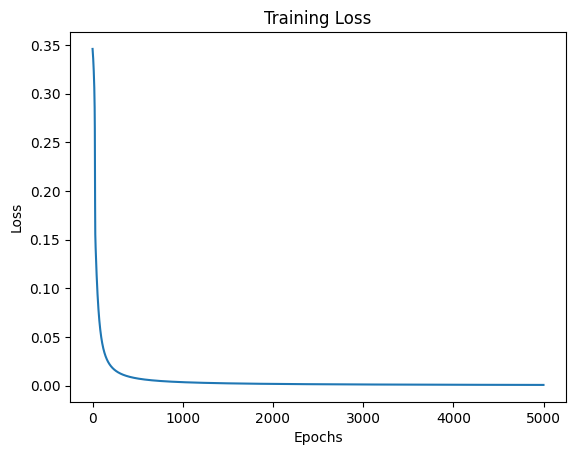

Predictions on the Test Set:
Input: [ 0.370825   -3.85793819], Predicted Class: 2
Input: [4.64331447 2.42937659], Predicted Class: 1
Input: [-1.73024538  2.54563433], Predicted Class: 0
Input: [-0.08593077 -3.80570706], Predicted Class: 2
Input: [ 1.12859406 -3.50399905], Predicted Class: 2
Input: [5.95591231 4.39009332], Predicted Class: 1
Input: [-0.51751904 -4.97882986], Predicted Class: 2
Input: [-0.30911444 -4.23346666], Predicted Class: 2
Input: [-5.17312341  5.94362119], Predicted Class: 0
Input: [3.98297959 4.37915174], Predicted Class: 1
Input: [-1.9518041  -4.65989173], Predicted Class: 2
Input: [-3.84505257  4.37816252], Predicted Class: 0
Input: [3.73226646 2.87198867], Predicted Class: 1
Input: [-0.65855297 -4.51423397], Predicted Class: 2
Input: [-4.50965218  3.5619257 ], Predicted Class: 0
Input: [-5.31590741  3.5384154 ], Predicted Class: 0
Input: [ 0.21348005 -5.20857365], Predicted Class: 2
Input: [-4.35399391  2.62504871], Predicted Class: 0
Input: [ 0.1993002  -4.05

In [3]:
# Neural Network Class Definition
class NeuralNetwork(object):
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.005):
        self.learning_rate = learning_rate

        # Initialize weights for input and hidden layers
        self.W_H1 = np.random.randn(input_neurons, hidden_neurons)  # Input -> Hidden Layer 1
        self.W_H2 = np.random.randn(hidden_neurons, hidden_neurons)  # Hidden Layer 1 -> Hidden Layer 2
        self.W_H3 = np.random.randn(hidden_neurons, hidden_neurons)  # Hidden Layer 2 -> Hidden Layer 3
        self.W_OH = np.random.randn(hidden_neurons, output_neurons)  # Hidden Layer 3 -> Output Layer

    def sigmoid(self, x, der=False):
        """Activation function: Sigmoid"""
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        """Forward pass"""
        self.hidden_input1 = np.dot(X, self.W_H1)
        self.hidden_output1 = self.sigmoid(self.hidden_input1)

        self.hidden_input2 = np.dot(self.hidden_output1, self.W_H2)
        self.hidden_output2 = self.sigmoid(self.hidden_input2)

        self.hidden_input3 = np.dot(self.hidden_output2, self.W_H3)
        self.hidden_output3 = self.sigmoid(self.hidden_input3)

        self.output_input = np.dot(self.hidden_output3, self.W_OH)
        pred = self.sigmoid(self.output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        """Backward pass"""
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error3 = output_delta.dot(self.W_OH.T)
        hidden_delta3 = self.learning_rate * hidden_error3 * self.sigmoid(self.hidden_output3, der=True)

        hidden_error2 = hidden_delta3.dot(self.W_H3.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error1 = hidden_delta2.dot(self.W_H2.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(self.hidden_output1, der=True)

        # Update weights
        self.W_OH += self.hidden_output3.T.dot(output_delta)
        self.W_H3 += self.hidden_output2.T.dot(hidden_delta3)
        self.W_H2 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_H1 += X.T.dot(hidden_delta1)

    def train(self, X, Y, epochs=5000, patience=200):
        """Train the network with Early Stopping"""
        err = []  # Initialize the error list here
        best_loss = np.inf
        wait = 0  # Early stopping counter

        for epoch in range(epochs):
            pred = self.feedForward(X)
            self.backPropagation(X, Y, pred)
            loss = np.mean(np.square(Y - pred))
            err.append(loss)  # Append loss at each epoch

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

            # Early Stopping: If no improvement for 'patience' epochs, stop training
            if loss < best_loss:
                best_loss = loss
                wait = 0
            else:
                wait += 1
                if wait >= patience:
                    print(f"Early stopping at epoch {epoch}")
                    break

        return err

    def predict(self, X):
        """Predict the class"""
        pred = self.feedForward(X)
        return np.argmax(pred, axis=1)  # Return the index of the highest probability


# Initialize and train the network
NN = NeuralNetwork(input_neurons=2, hidden_neurons=20, output_neurons=3, learning_rate=0.005)

# Training the network and capturing error values
err = NN.train(X_train, Y_train, epochs=5000, patience=200)

# Plot the loss over training epochs
plt.plot(range(0, len(err)), err)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Predict on the test set
predictions = NN.predict(X_test)

# Visualizing predictions
print("Predictions on the Test Set:")
for i in range(len(X_test)):
    print(f"Input: {X_test[i]}, Predicted Class: {predictions[i]}")


This code implements a fully connected multi-layer neural network with forward propagation, backpropagation for weight updates, and early stopping based on loss; it trains the network on a dataset, visualizes the loss curve, predicts test data classes, and displays predictions.

Test Accuracy: 1.00


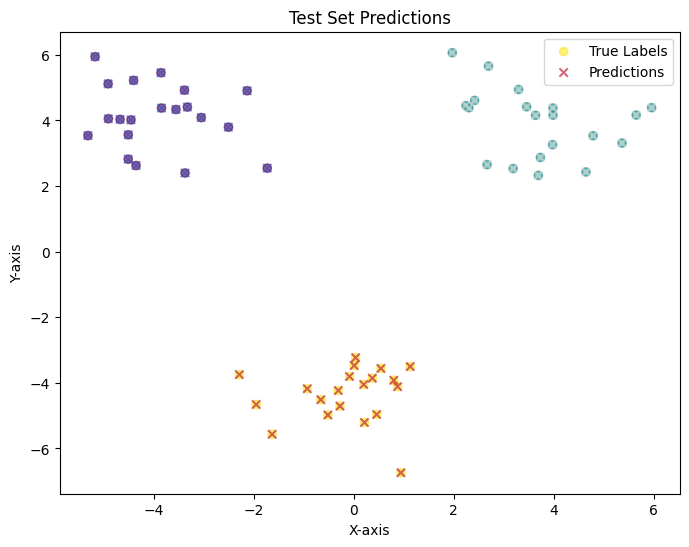

In [4]:
# Test the network
predictions = NN.predict(X_test)  # Predictions for test set
true_labels = np.argmax(Y_test, axis=1)  # True labels from test set

# Calculate accuracy
accuracy = np.mean(predictions == true_labels)
print(f"Test Accuracy: {accuracy:.2f}")

# Visualize the dataset with true and predicted labels
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=true_labels, cmap='viridis', marker='o', label='True Labels', alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='coolwarm', marker='x', label='Predictions', alpha=0.6)
plt.legend()
plt.title('Test Set Predictions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


This code evaluates the neural network's performance on the test set by calculating accuracy, comparing predicted labels with true labels, and visualizing the test data with true labels and predicted labels using different markers and color maps.